In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/lilytrautman/Desktop/Stat 2604/STAT 2604 Group Project/Impact_of_Remote_Work_on_Mental_Health.csv")

Loading the CSV data into a DataFrame.
Then clean and preprocess the data (haven't done this yet because I don't know how to)

Look at subsets

Then formulate the hyptheses 
H0: Remote work has no signifigant impact on mental health
H1: Remote work has a signigigant impac on mental health 

Do statistical tests such as a chi-square test.
This data is only taking people who are remote

In [4]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Work_Location'], df['Mental_Health_Condition'])

# Step 3: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant impact of work location on mental health conditions.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant impact of work location on mental health conditions.")

# Print the results
print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

Fail to reject the null hypothesis (H0). There is no significant impact of work location on mental health conditions.
Chi2 Statistic: 4.580946214641876
p-value: 0.5985667674031616
Degrees of Freedom: 6
Expected Frequencies:
[[421.4844 422.144  410.9308 394.4408]
 [418.4172 419.072  407.9404 391.5704]
 [438.0984 438.784  427.1288 409.9888]]


Bar chart of only remote workers and the mental health conditions of depression, anxiety, burnout, or none

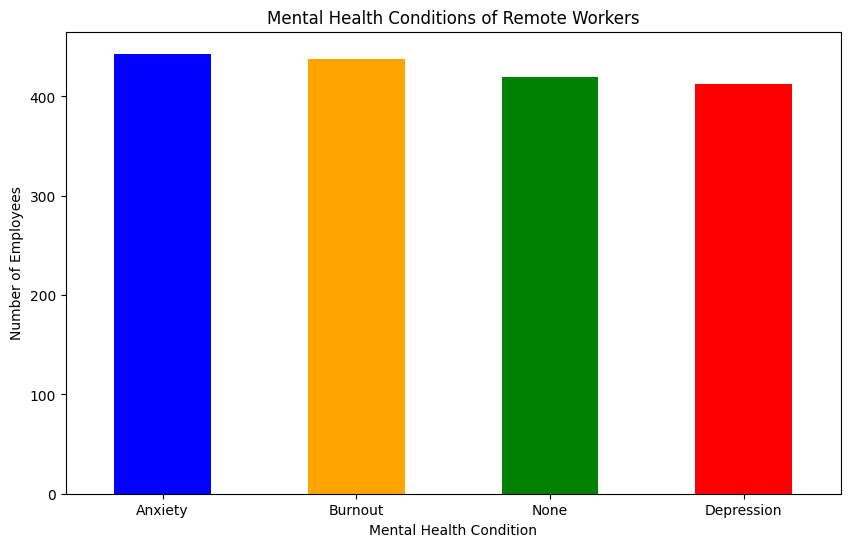

In [5]:
remote_workers = df[df['Work_Location'] == 'Remote']

# Step 3: Count the occurrences of each mental health condition
mental_health_counts = remote_workers['Mental_Health_Condition'].value_counts()

# Step 4: Plot the bar graph
plt.figure(figsize=(10, 6))
mental_health_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Mental Health Conditions of Remote Workers')
plt.xlabel('Mental Health Condition')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

Bar chart of onsite workers and their mental health conditions

Needed to group together the mental health conditions to be considered as on thing. So Depression, anxiety, and burnout are all considered a mental health issue, while none is considered as none.

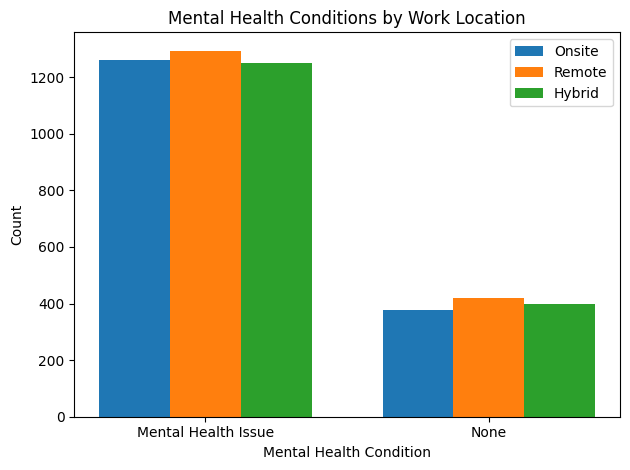

In [31]:


# Define the mental health mapping
mental_health_mapping = {
    'Depression': 'Mental Health Issue',
    'Anxiety': 'Mental Health Issue',
    'Burnout': 'Mental Health Issue',
    'None': 'None'
}

# Map the mental health conditions to the grouped categories
df['Grouped'] = df['Mental_Health_Condition'].map(mental_health_mapping).fillna('Unknown')

# Filter the DataFrame for each work location
onsite_df = df[df['Work_Location'] == 'Onsite']
remote_df = df[df['Work_Location'] == 'Remote']
hybrid_df = df[df['Work_Location'] == 'Hybrid']

# Count the occurrences of each grouped mental health condition for each work location
onsite_counts = onsite_df['Grouped'].value_counts()
remote_counts = remote_df['Grouped'].value_counts()
hybrid_counts = hybrid_df['Grouped'].value_counts()

# Create a bar chart to visualize the data
fig, ax = plt.subplots()

bar_width = 0.25
index = range(len(onsite_counts))

bar1 = plt.bar(index, onsite_counts, bar_width, label='Onsite')
bar2 = plt.bar([i + bar_width for i in index], remote_counts, bar_width, label='Remote')
bar3 = plt.bar([i + 2 * bar_width for i in index], hybrid_counts, bar_width, label='Hybrid')

plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.title('Mental Health Conditions by Work Location')
plt.xticks([i + bar_width for i in index], onsite_counts.index)
plt.legend()

plt.tight_layout()
plt.show()